In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.isna().sum()
# w BMI jest trochę brakujących rekordów 
# w 'smoking_status' też wystąpuje unknown 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df['smoking_status'].value_counts()
#lepiej póki co zostawić jako Uknown bo jeśli wstawimy to do którejś 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [14]:
df.corr()
#nie widać dużych zależności w danych na pierwszy rzut oka

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
df = df.drop(columns='id')
#usuwamy id bo jest niepotrzebne

In [10]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [23]:
mediana_bmi = df['bmi'].median()
srednia_bmi = df['bmi'].mean()
najwyzsze_bmi = df['bmi'].max()
najnizsze_bmi = df['bmi'].min()

print("Mediana: {}, Średnia: {}, Max: {}, Min {} ".format(mediana_bmi, srednia_bmi,najwyzsze_bmi,najnizsze_bmi))
#można uzupełnić medianą albo średnią

Mediana: 28.1, Średnia: 28.893236911794673, Max: 97.6, Min 10.3 


In [30]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [33]:
df['bmi'].isna().sum()

0

In [38]:
df.describe()
#to są zmienne ciągłe
#dziwne jest to, że w hypertension, stroke i heart_disease nie ma min, ani kwartyli - prawdopodobnie oznacza to, że są to dane kategoryczne a nie zmienne 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

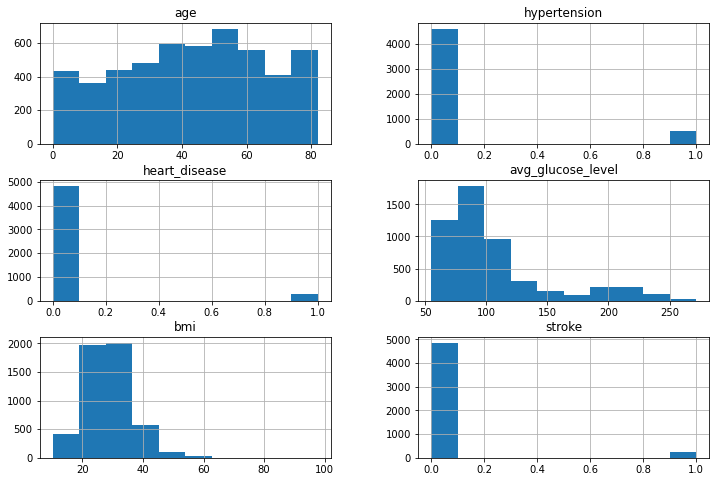

In [44]:
df.hist(figsize=[12,8])

In [45]:
#tutaj widać potwierdzenie, że heart_dises, stroke i hypertension mają wartości 0 - 1

In [47]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
df['gender'].value_counts()
df.drop(df.index[df['gender'] == 'Other'], inplace = True)

In [54]:
df1 = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df1
#gender_Other usuwam bo jest to tylko jeden rekord

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [56]:
corr_pear = df1.corr('pearson')
corr_pear

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276367,0.263777,0.238323,0.324211,0.245239,0.027752,-0.027752,-0.679084,0.679084,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
hypertension,0.276367,1.000000,0.108292,0.174540,0.158252,0.127891,-0.021223,0.021223,-0.164187,0.164187,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036879,0.134905,-0.085685,0.085685,-0.114601,0.114601,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167033,0.131991,-0.054722,0.054722,-0.155329,0.155329,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.324211,0.158252,0.036879,0.167033,1.000000,0.036075,0.026452,-0.026452,-0.334770,0.334770,...,-0.028340,0.204057,0.070094,-0.442204,0.000444,-0.000444,-0.265052,0.103948,0.107524,0.084329
stroke,0.245239,0.127891,0.134905,0.131991,0.036075,1.000000,-0.009081,0.009081,-0.108299,0.108299,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
gender_Female,0.027752,-0.021223,-0.085685,-0.054722,0.026452,-0.009081,1.000000,-1.000000,-0.030171,0.030171,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408
gender_Male,-0.027752,0.021223,0.085685,0.054722,-0.026452,0.009081,-1.000000,1.000000,0.030171,-0.030171,...,0.011486,-0.032502,-0.026045,0.089226,0.006105,-0.006105,0.059557,0.043121,-0.098952,0.011408
ever_married_No,-0.679084,-0.164187,-0.114601,-0.155329,-0.334770,-0.108299,-0.030171,0.030171,1.000000,-1.000000,...,0.090873,-0.154104,-0.192637,0.544658,0.005988,-0.005988,0.332335,-0.171960,-0.102663,-0.105132
ever_married_Yes,0.679084,0.164187,0.114601,0.155329,0.334770,0.108299,0.030171,-0.030171,-1.000000,1.000000,...,-0.090873,0.154104,0.192637,-0.544658,-0.005988,0.005988,-0.332335,0.171960,0.102663,0.105132


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

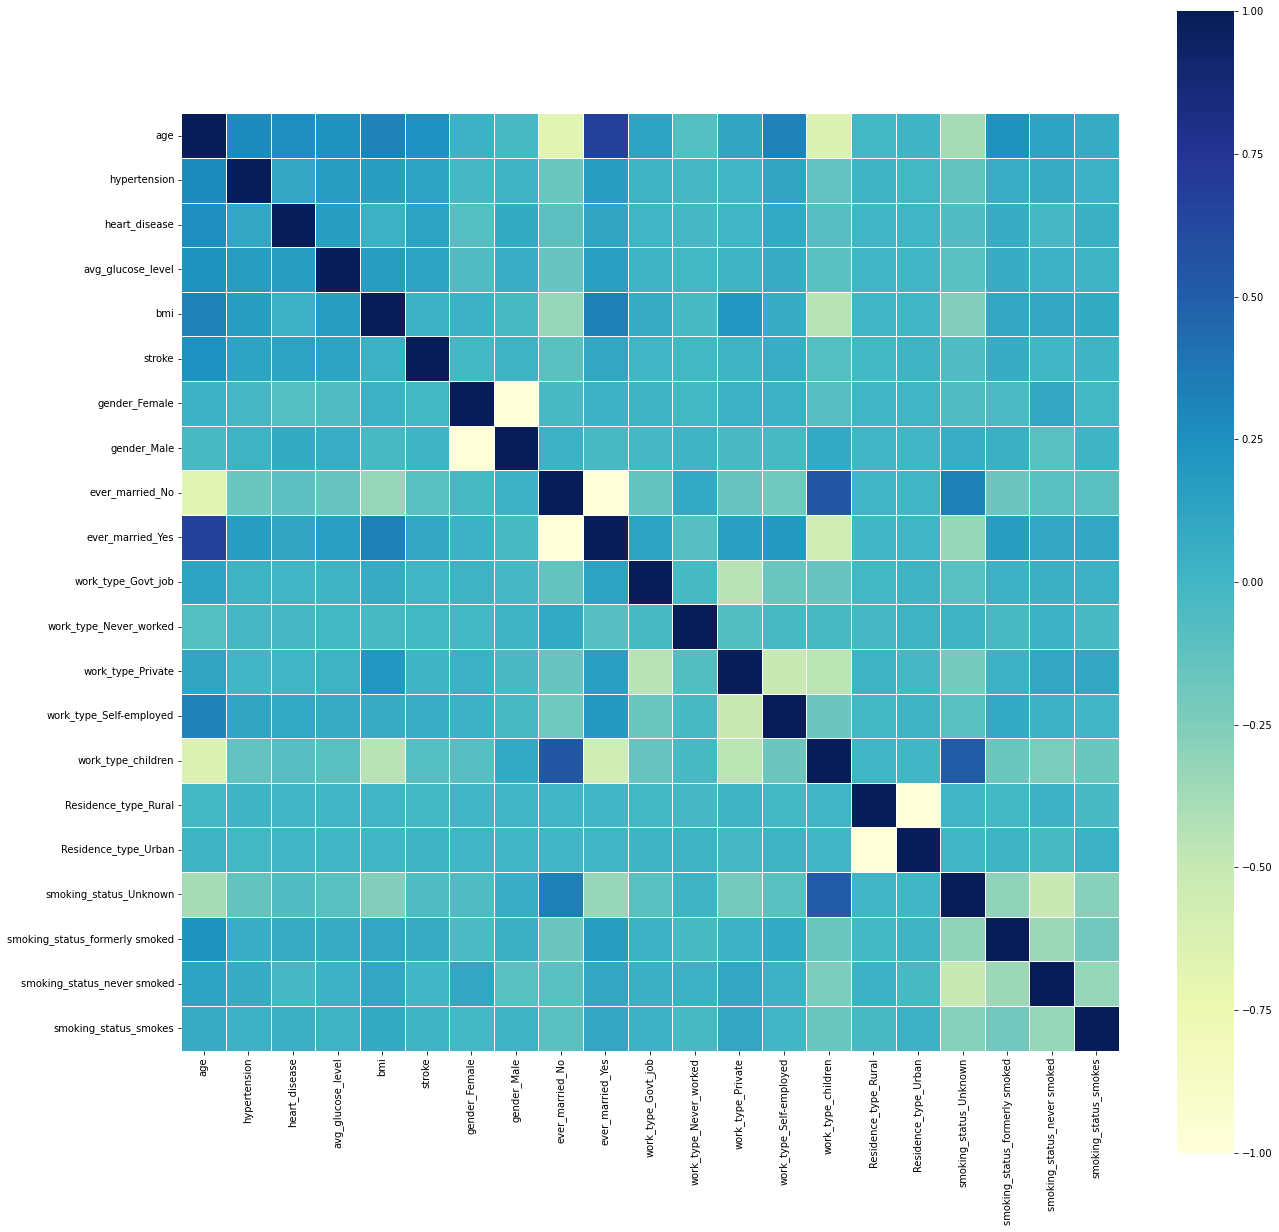

In [62]:
f, ax = plt.subplots(figsize=(21,21))
sns.heatmap(corr_pear, square=True, linewidths=1, cmap="YlGnBu")

In [63]:
#widać pewne korelacje ale nie wygląda to na coś co by trzeba było zmienić

In [64]:
from sklearn.model_selection import train_test_split

In [72]:
X = df1.drop(columns=['stroke'])
Y = df1['stroke']

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)
#podział na set treningowy 80% do setu testowego 20%

In [99]:
#standaryzacja i modele
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [77]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
pca_results = PCA(n_components=5)
pca_results.fit(X_train_scaled)

PCA(n_components=5)

In [83]:
X_train_pca = pca_results.transform(X_train_scaled)
X_train_pca

array([[-1.81073317, -1.31501171, -1.58980227, -1.27923818,  0.73649655],
       [-1.3967216 , -1.0686942 ,  0.86979234,  1.47130466, -1.11899442],
       [ 0.25219913,  2.00179765, -1.00240916,  1.01056675,  0.13524195],
       ...,
       [-1.682215  , -0.92332651, -1.79600188,  1.2310233 ,  1.47424963],
       [-1.63557484, -1.23660171,  1.15333998, -0.63568321, -1.67502137],
       [-1.10505735, -1.9664651 ,  1.13491509, -0.80982393,  0.65519849]])

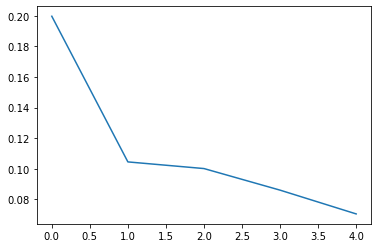

In [84]:
plt.plot(pca_results.explained_variance_ratio_)
pass

In [85]:
PCA_result = PCA(n_components = 5)
PCA_result.fit(X_test_scaled)
X_test_PCA = PCA_result.transform(X_test_scaled)

In [86]:
PCA_result.fit(X_train)
X_train_PCA2 = PCA_result.transform(X_train)
PCA_result.fit(X_test)
X_test_PCA2 = PCA_result.transform(X_test)

In [ ]:
#drzewa decyzyjne

In [89]:
model_tree= DecisionTreeClassifier().fit(X_train,Y_train)
model_tree.fit(X_train, Y_train)
tree_train_acc = round(model_tree.score(X_train, Y_train),2)
tree_test_acc = round(model_tree.score(X_test, Y_test),2)
pred = model_tree.predict(X_test)

In [90]:
train_acc

1.0

In [91]:
test_acc

0.91

In [107]:
importance_tree = model_tree.feature_importances_

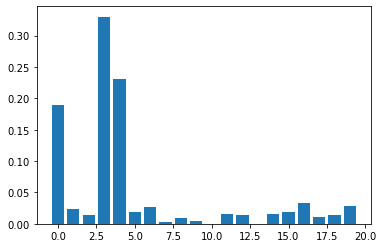

In [109]:
plt.bar([x for x in range(len(importance))], importance_tree)
plt.show()

In [110]:
#lasy losowe

In [111]:
las = RandomForestClassifier().fit(X_train, Y_train)

In [112]:
forest_train = round(las.score(X_train, Y_train),2)
forest_test = round(las.score(X_test, Y_test),2)
pred = model_tree.predict(X_test)

In [113]:
importance_las = las.feature_importances_

In [114]:
forest_train

1.0

In [115]:
forest_test

0.95

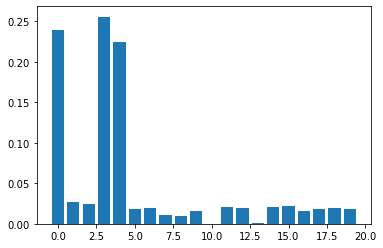

In [116]:
plt.bar([x for x in range(len(importance))], importance_las)
plt.show()

In [118]:
#ocena
param_grid = {"max_depth": [5, None], "max_features": list(range(0,19))}
print(param_grid)

{'max_depth': [5, None], 'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}


In [120]:
from sklearn.metrics import classification_report

In [121]:
pred_tree_train =  model_tree.predict(X_train)
pred_tree_test =  model_tree.predict(X_test)
print(classification_report(Y_test, pred_tree_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       970
           1       0.13      0.15      0.14        52

    accuracy                           0.91      1022
   macro avg       0.54      0.55      0.55      1022
weighted avg       0.91      0.91      0.91      1022



In [123]:
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5,verbose=0)
grid_search.fit(X_train, Y_train)
grid_search.cv_results_

C:\Users\siedl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siedl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siedl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siedl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0

{'mean_fit_time': array([0.00359893, 0.00278964, 0.00301623, 0.00298491, 0.00361891,
        0.00378761, 0.00339079, 0.00418849, 0.00399151, 0.00418973,
        0.00458736, 0.00478606, 0.00480251, 0.00499854, 0.00560107,
        0.00519705, 0.00589418, 0.00637589, 0.00622072, 0.00200119,
        0.00297947, 0.00297246, 0.00361738, 0.00416946, 0.00482488,
        0.00439701, 0.00541124, 0.00540285, 0.00558867, 0.00573444,
        0.00678849, 0.00737915, 0.00737853, 0.00756879, 0.0075839 ,
        0.00796585, 0.00837779, 0.00877595]),
 'std_fit_time': array([2.71919925e-03, 3.98743954e-04, 2.10284646e-05, 3.14653275e-05,
        8.08444129e-04, 7.45814498e-04, 4.88421906e-04, 7.46301939e-04,
        3.15467067e-04, 4.01496887e-04, 4.88675003e-04, 7.48343584e-04,
        4.06697356e-04, 6.26476574e-04, 5.00846984e-04, 3.95831196e-04,
        4.93172159e-04, 7.90741010e-04, 3.92389399e-04, 4.43721509e-05,
        4.22339923e-05, 1.75639263e-05, 4.78701134e-04, 4.00416377e-04,
        4.247

In [126]:
najlepsze = grid_search.best_index_ 
print('Best params:',grid_search.best_params_, '(no. {0})'.format(najlepsze))
print('Best results:',grid_search.best_score_ )

Best params: {'max_depth': 5, 'max_features': 1} (no. 1)
Best results: 0.951064332805631


In [129]:
#Lasy losowe
predykcje_las = las.predict(X_test)
print(classification_report(Y_test, predykcje_las))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       970
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\siedl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siedl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siedl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4,verbose=0)
grid_search.fit(X_train, Y_train)
grid_search.cv_results_

C:\Users\siedl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siedl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siedl\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 441, in fit
    trees = Parallel(
  File "C:\Users\siedl\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\siedl\anaconda3\lib\site-packages\job

{'mean_fit_time': array([0.0348509 , 0.13824028, 0.15232134, 0.15597874, 0.17114258,
        0.18946427, 0.1944828 , 0.20705718, 0.22212017, 0.23286295,
        0.24917227, 0.26342601, 0.28379095, 0.29779512, 0.30255884,
        0.31221193, 0.33482867, 0.34289032, 0.34478849, 0.03117669,
        0.17895216, 0.19702303, 0.20663279, 0.22506136, 0.25070894,
        0.25614882, 0.27491623, 0.3041665 , 0.31800914, 0.33232599,
        0.34880209, 0.37606978, 0.3842051 , 0.4106431 , 0.42203647,
        0.439493  , 0.45135856, 0.47214365]),
 'std_fit_time': array([0.00286221, 0.00691568, 0.00469842, 0.00148817, 0.00140649,
        0.01326129, 0.0026238 , 0.00098375, 0.00459025, 0.0023349 ,
        0.00327323, 0.00550837, 0.007749  , 0.00675238, 0.00530957,
        0.0072135 , 0.00227528, 0.00913818, 0.00929182, 0.00043382,
        0.00360969, 0.00930044, 0.00579663, 0.00386758, 0.01045722,
        0.00161846, 0.00078463, 0.01457093, 0.00591468, 0.00394491,
        0.00862647, 0.0138317 , 0.003

In [133]:
best_param_no = grid_search.best_index_ 
print('Best params:',grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Besty results:',grid_search.best_score_ )

Best params: {'max_depth': 5, 'max_features': 1} (no. 1)
Besty results: 0.9517984363589667
